In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Nifty 50
ticker = "^NSEI"  # Nifty 50 index symbol on Yahoo Finance

# Set the time period for historical data
start_date = "2010-10-24"  # 10 years ago from today
end_date = "2020-10-24"    # Today's date

# Fetch historical data
nifty_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(nifty_data.head())

nifty_data.to_csv("nifty_50_historical_data.csv")

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                            
2010-10-25 00:00:00+00:00  6105.799805  6105.799805  6151.299805  6094.600098   
2010-10-26 00:00:00+00:00  6082.000000  6082.000000  6120.250000  6074.649902   
2010-10-27 00:00:00+00:00  6012.649902  6012.649902  6075.950195  5987.549805   
2010-10-28 00:00:00+00:00  5987.700195  5987.700195  6071.100098  5968.100098   
2010-10-29 00:00:00+00:00  6017.700195  6017.700195  6032.649902  5937.100098   

Price                             Open Volume  
Ticker                           ^NSEI  ^NSEI  
Date                                           
2010-10-25 00:00:00+00:00  6101.250000      0  
2010-10-26 00:00:00+00:00  6116.299805      0  
2010-10-27 00:00:00+00:00  6075.450195      0  
2010-10-28 00:00:00+00:00  6039.950195      0  
2010-10-29 00:0

In [ ]:

# Select the 'Open' price and 'Date'
nifty_open_data = nifty_data[['Open']].reset_index()

# Display the first few rows of the selected data
print(nifty_open_data.head())


Price                       Date         Open
Ticker                                  ^NSEI
0      2010-10-25 00:00:00+00:00  6101.250000
1      2010-10-26 00:00:00+00:00  6116.299805
2      2010-10-27 00:00:00+00:00  6075.450195
3      2010-10-28 00:00:00+00:00  6039.950195
4      2010-10-29 00:00:00+00:00  6021.149902


In [ ]:
length_data = len(nifty_open_data )     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2444
Train data length : 1711
Validation data lenth : 733


In [ ]:
train_data = nifty_open_data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

Price,Date,Open
Ticker,,^NSEI
0,2010-10-25 00:00:00+00:00,6101.250000
1,2010-10-26 00:00:00+00:00,6116.299805
2,2010-10-27 00:00:00+00:00,6075.450195
3,2010-10-28 00:00:00+00:00,6039.950195
4,2010-10-29 00:00:00+00:00,6021.149902
...,...,...
1706,2017-10-24 00:00:00+00:00,10218.549805
1707,2017-10-25 00:00:00+00:00,10321.150391
1708,2017-10-26 00:00:00+00:00,10291.799805


In [ ]:
validation_data = nifty_open_data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

Price,Date,Open
Ticker,,^NSEI
1711,2017-10-31 00:00:00+00:00,10364.900391
1712,2017-11-01 00:00:00+00:00,10390.349609
1713,2017-11-02 00:00:00+00:00,10440.500000
1714,2017-11-03 00:00:00+00:00,10461.549805
1715,2017-11-06 00:00:00+00:00,10431.750000
...,...,...
2439,2020-10-19 00:00:00+00:00,11879.200195
2440,2020-10-20 00:00:00+00:00,11861.000000
2441,2020-10-21 00:00:00+00:00,11958.549805


In [ ]:
dataset_train = train_data['Open'].values
dataset_train.shape

(1711, 1)

In [ ]:
import numpy as np
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1711, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1711, 1)

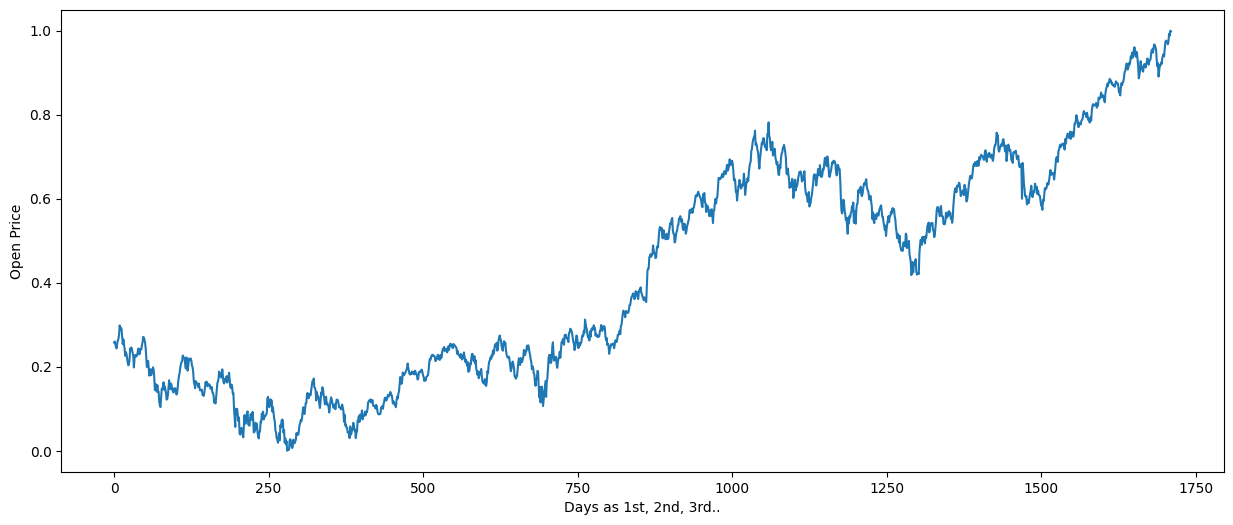

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])


X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1661, 50)
Shape of y_train before reshape : (1661,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1661, 50, 1)
Shape of y_train after reshape : (1661, 1)


In [ ]:
X_train[0]

array([[0.25754687],
       [0.26016918],
       [0.25305147],
       [0.24686588],
       [0.24359008],
       [0.25598737],
       [0.2621294 ],
       [0.26614572],
       [0.27642599],
       [0.29831946],
       [0.28886684],
       [0.29273504],
       [0.28979905],
       [0.27166914],
       [0.25382679],
       [0.26489991],
       [0.25313859],
       [0.24187378],
       [0.22612234],
       [0.23494767],
       [0.23063519],
       [0.21968415],
       [0.21003109],
       [0.20330542],
       [0.20707774],
       [0.21742769],
       [0.24392113],
       [0.24223103],
       [0.24576811],
       [0.23904235],
       [0.23195944],
       [0.22670607],
       [0.19826109],
       [0.21945759],
       [0.22748148],
       [0.22790832],
       [0.22431892],
       [0.22715911],
       [0.23300489],
       [0.24321548],
       [0.24093289],
       [0.22949394],
       [0.24222227],
       [0.2408371 ],
       [0.24080221],
       [0.25076888],
       [0.25821772],
       [0.270

In [ ]:
y_train[0]

array([0.25854876])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()


regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(Dense(units = 1))

regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 4.0299e-04 - loss: 0.4076
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0014 - loss: 0.1713
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 4.5438e-05 - loss: 0.1137
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0019 - loss: 0.0808
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 6.0008e-04 - loss: 0.0560
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0023 - loss: 0.0480
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 4.7142e-04 - loss: 0.0370
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 3.3783e-04 - loss: 0.0289
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0015 - loss: 0.0245
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0012 - loss: 0.0225
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0011 - loss: 0.0169
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [ ]:
history.history["loss"]

[0.3150601089000702,
 0.15713471174240112,
 0.10518229752779007,
 0.07498998939990997,
 0.052316825836896896,
 0.045602068305015564,
 0.03530789539217949,
 0.0269402414560318,
 0.023408561944961548,
 0.022073080763220787,
 0.018139101564884186,
 0.01613597571849823,
 0.014167564921081066,
 0.013460863381624222,
 0.01256914809346199,
 0.010027017444372177,
 0.009857531636953354,
 0.008929231204092503,
 0.008181179873645306,
 0.007921893149614334,
 0.007487287744879723,
 0.006822689436376095,
 0.006386141758412123,
 0.00581716513261199,
 0.005743307061493397,
 0.005708255805075169,
 0.006016561295837164,
 0.004921923857182264,
 0.0050659868866205215,
 0.004267243202775717,
 0.004651249852031469,
 0.004550601821392775,
 0.004491313826292753,
 0.0037903639022260904,
 0.0037880116142332554,
 0.004029649309813976,
 0.0034827222116291523,
 0.0032755103893578053,
 0.0031861313618719578,
 0.003540334291756153,
 0.003330838168039918,
 0.00307374051772058,
 0.0031400159932672977,
 0.0031050997786

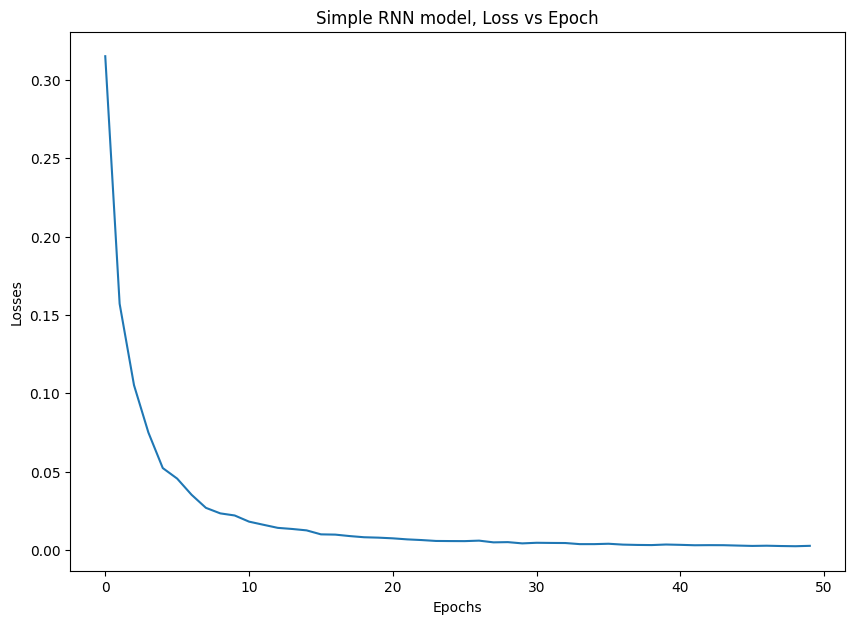

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

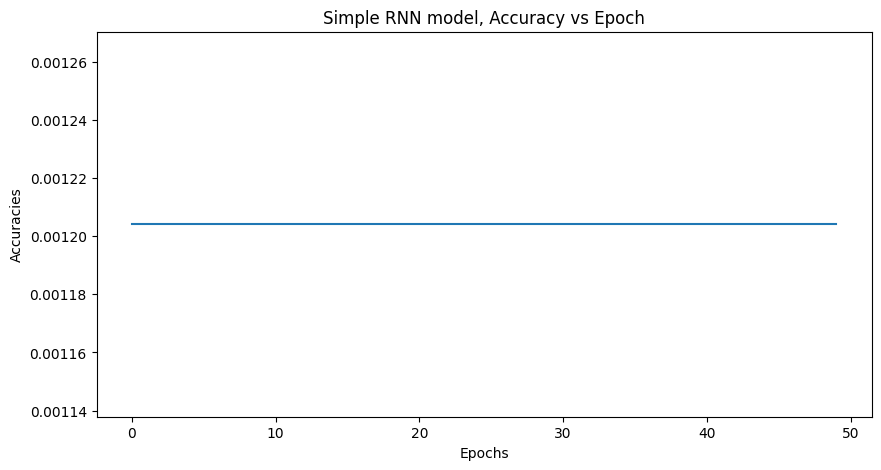

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()


In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


(1661, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1661, 1)

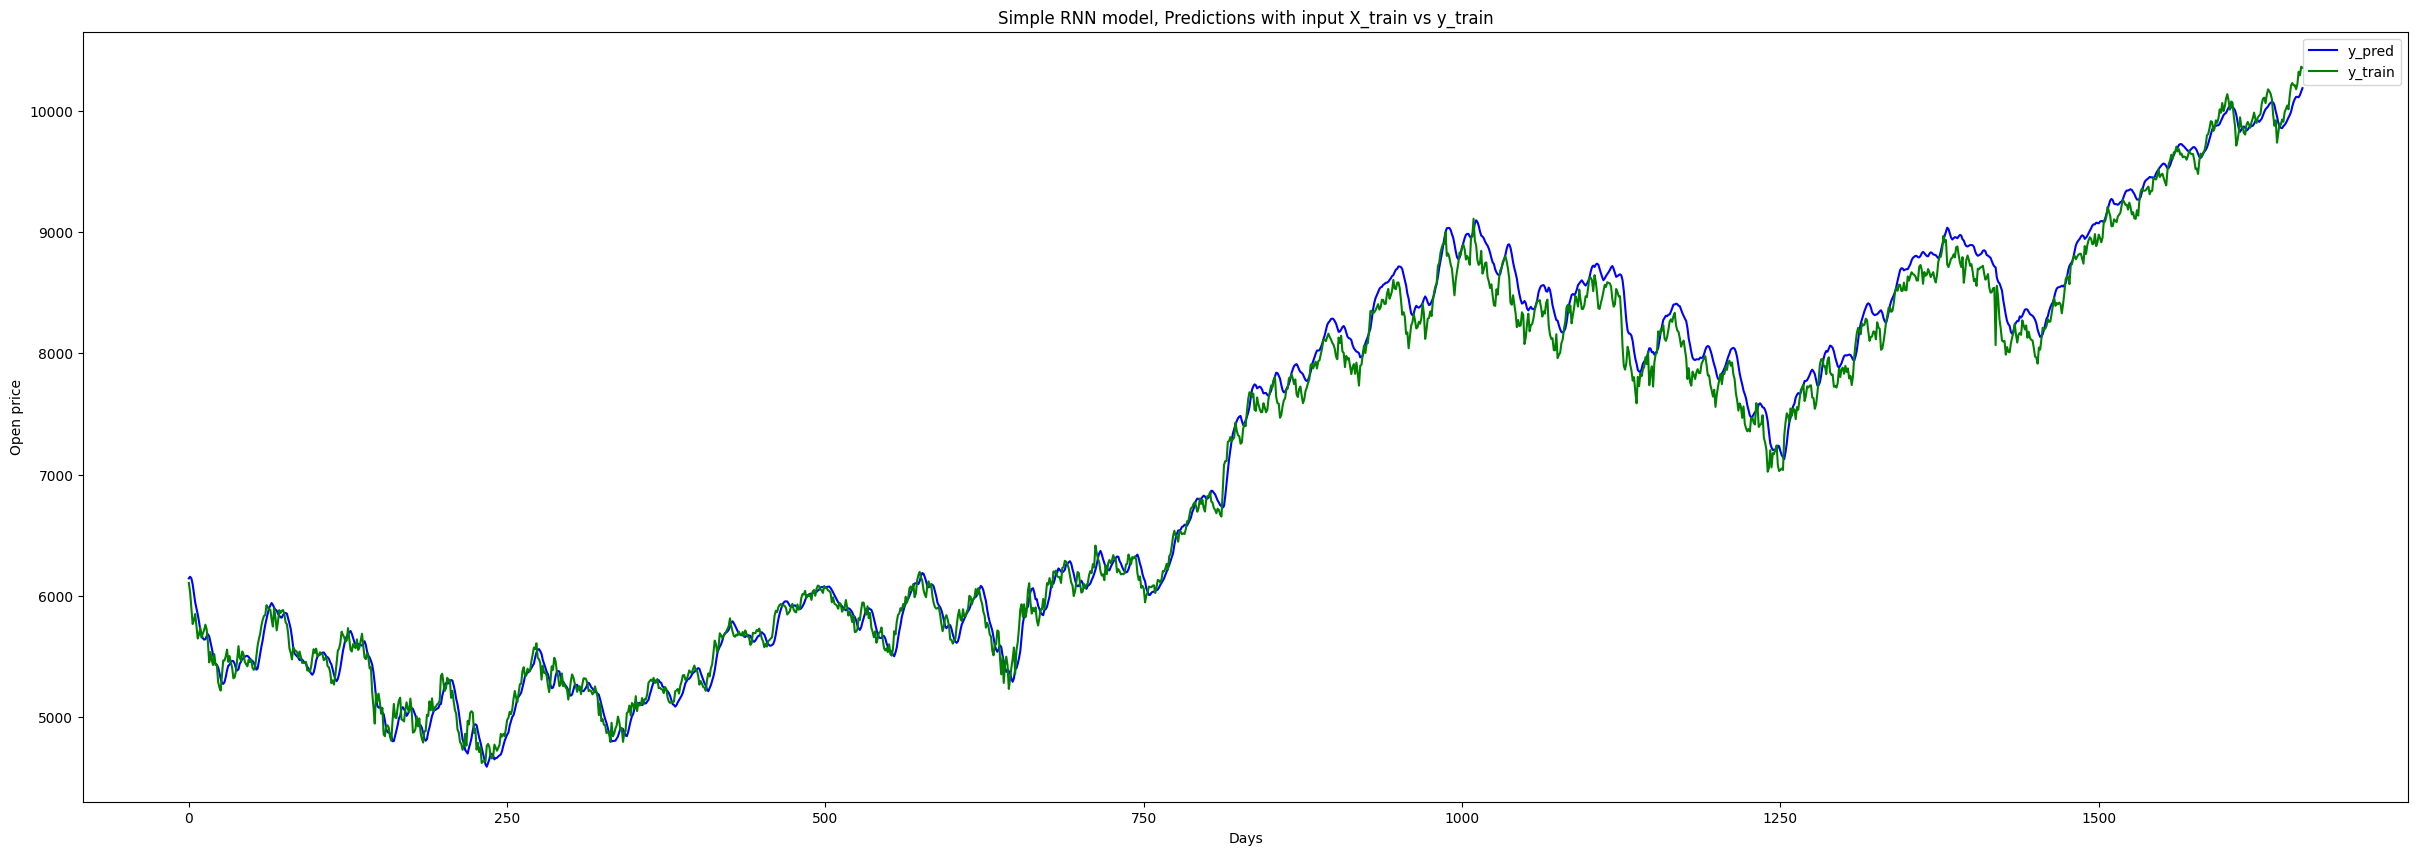

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [ ]:
dataset_validation = validation_data['Open'].values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (733, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (683, 50)
Shape of y_test before reshape : (683,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (683, 50, 1)
Shape of y_test after reshape : (683, 1)


In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Shape of y_pred_of_test : (683, 1)


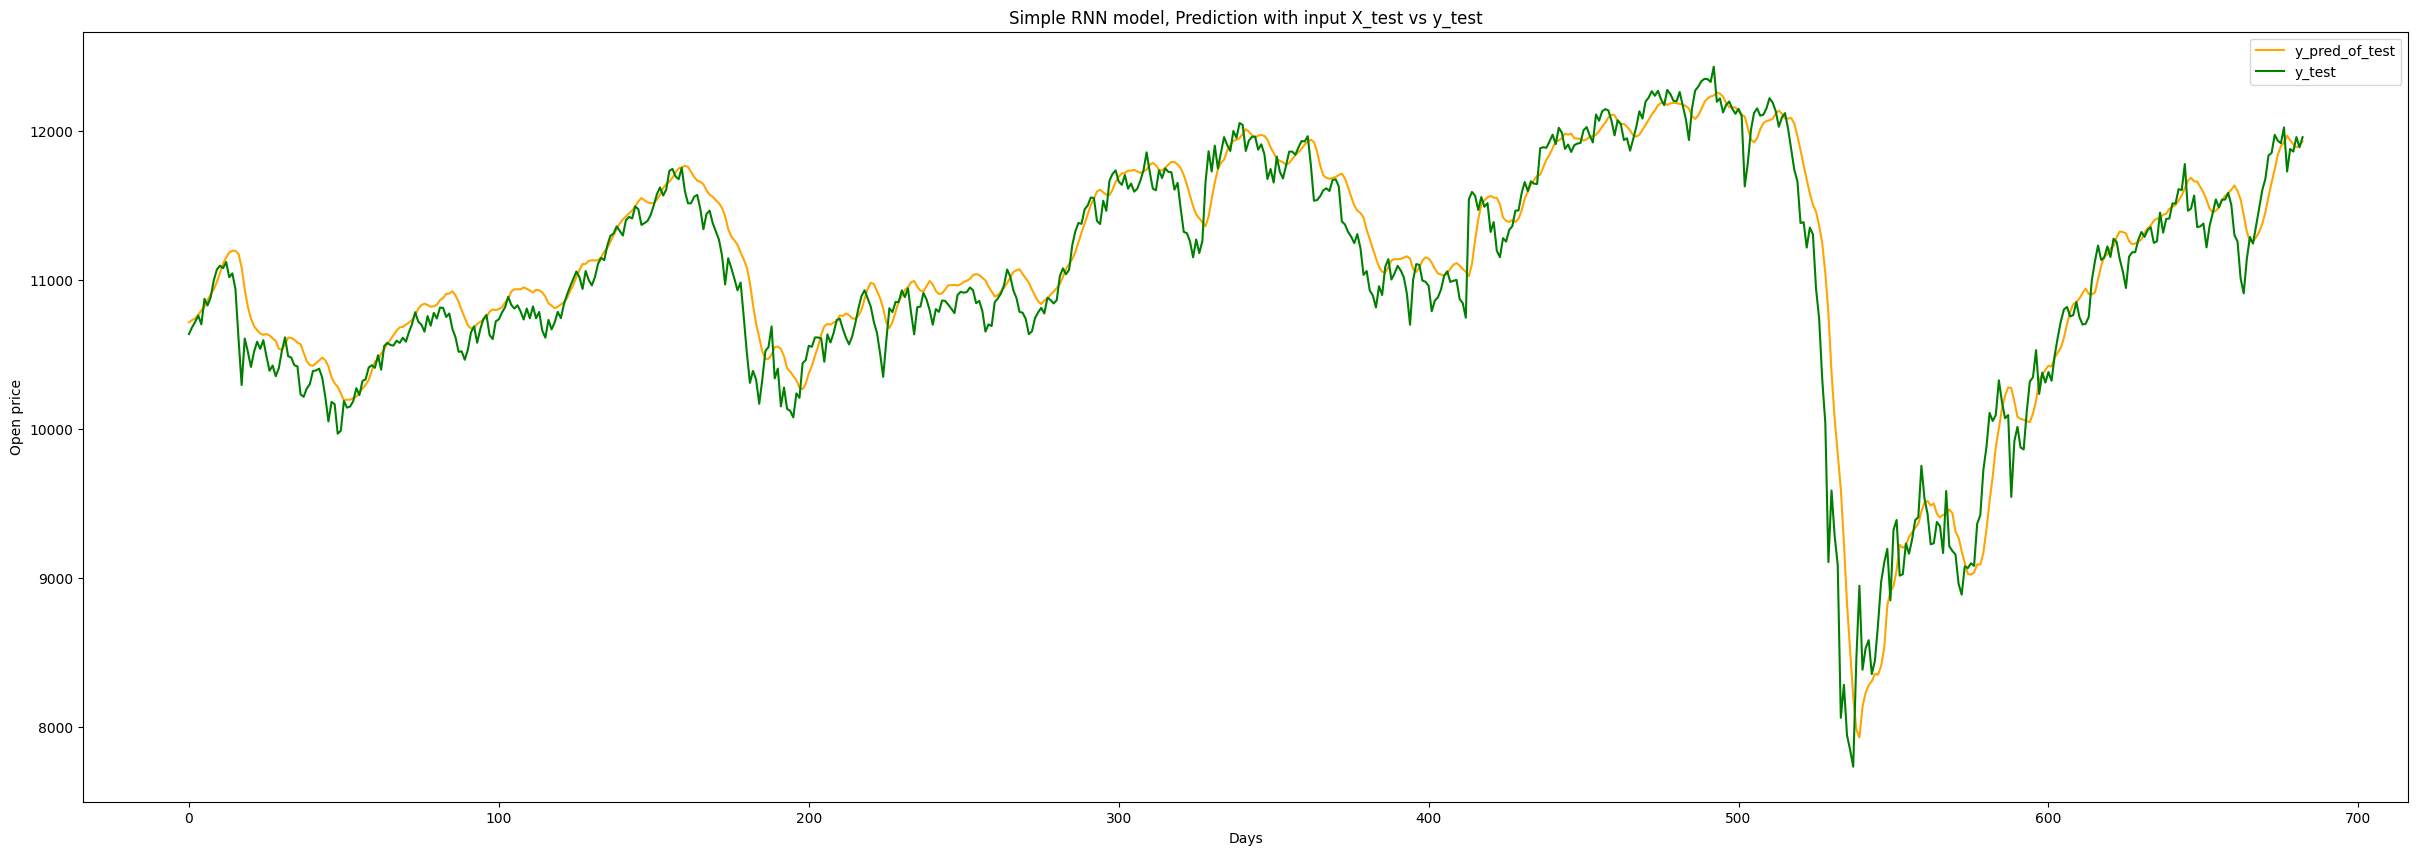

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

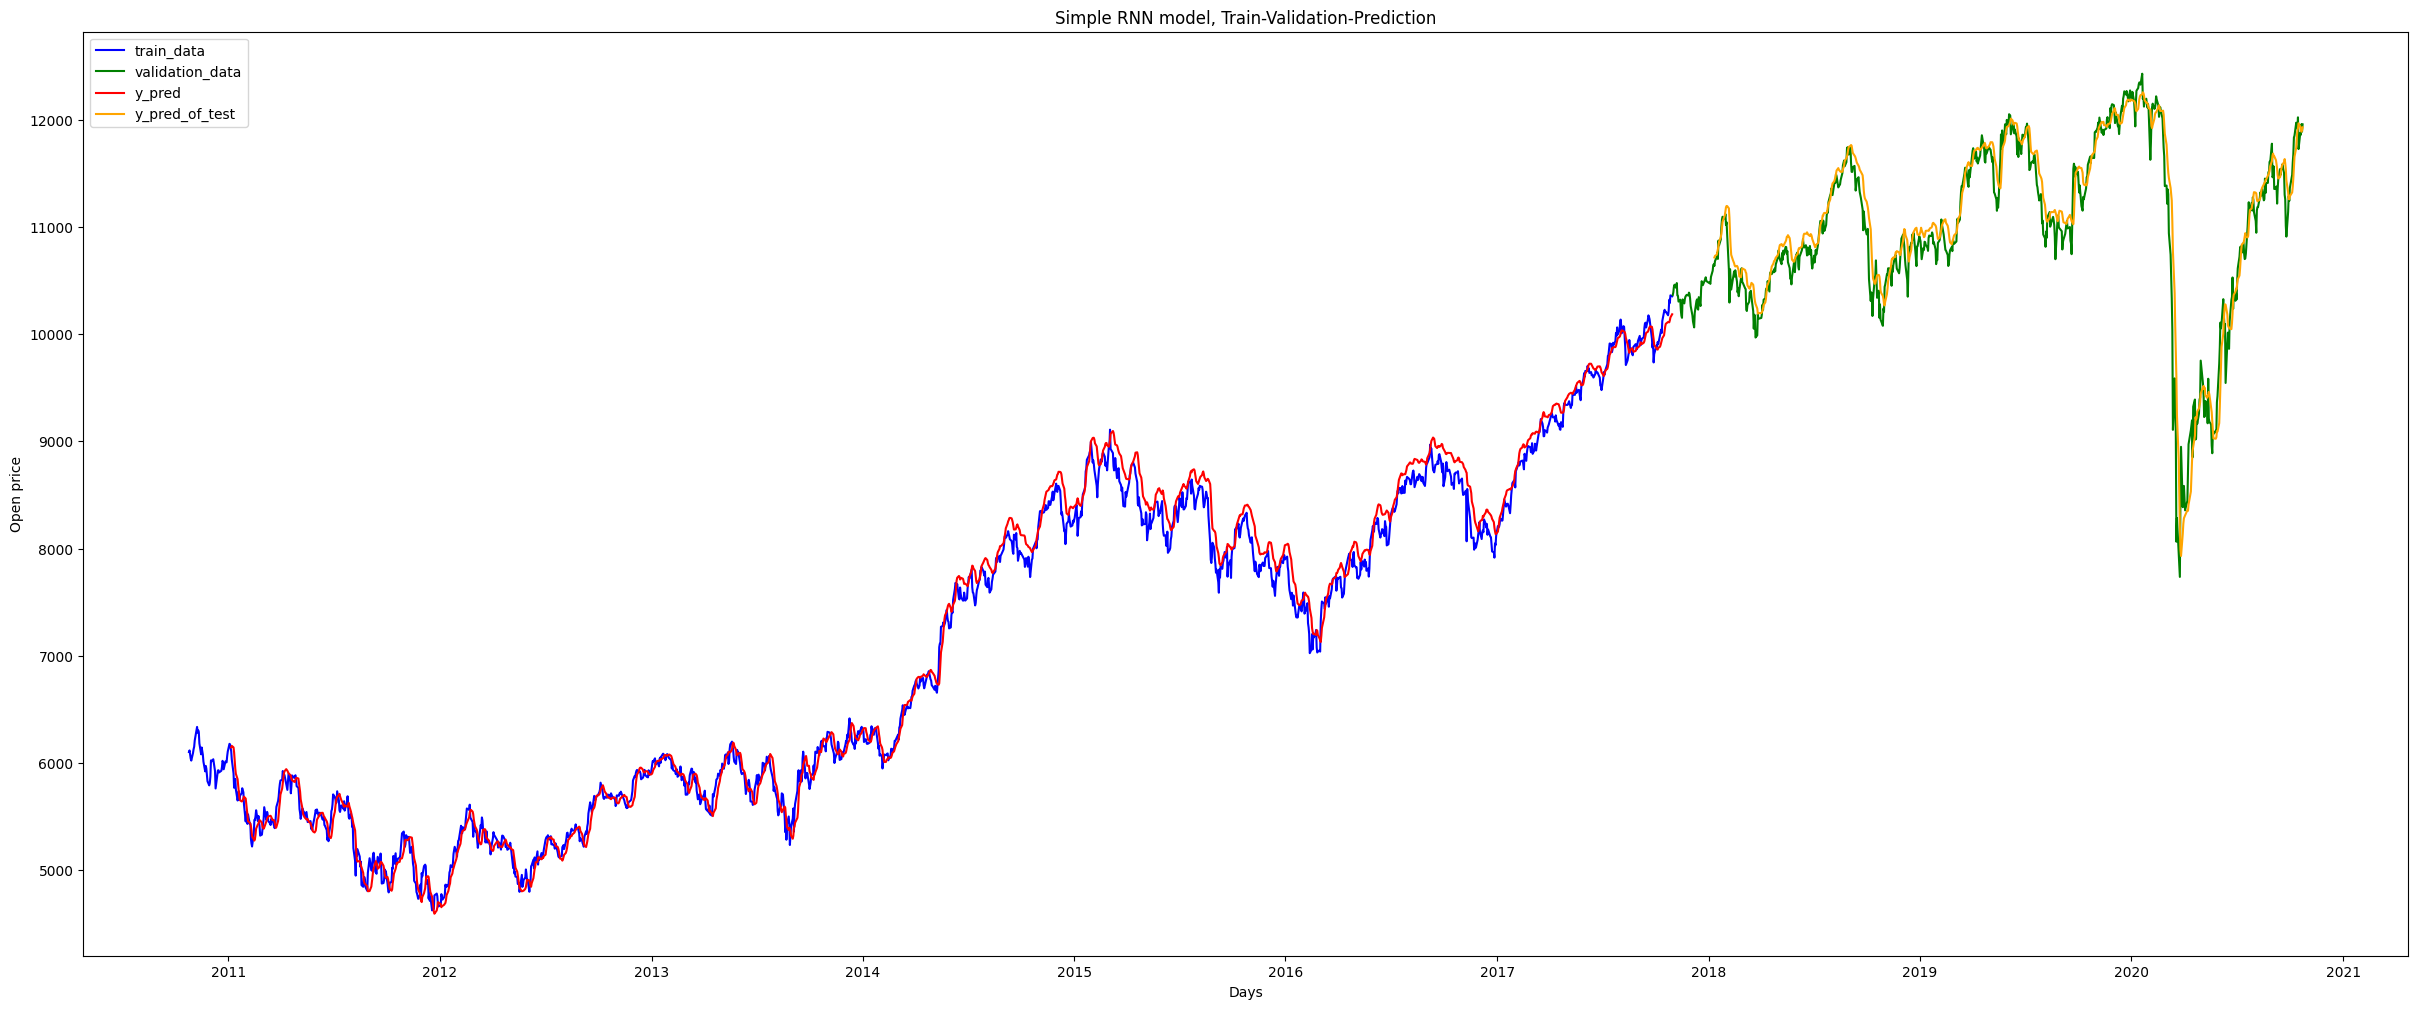

In [ ]:

plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data['Open'].values , label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data['Open'].values , label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 3.8425e-04 - loss: 0.0240
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0019 - loss: 8.5108e-04
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 4.8615e-04 - loss: 7.5695e-04
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 5.2079e-04 - loss: 7.2000e-04
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0012 - loss: 6.9207e-04
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.0012 - loss: 7.0455e-04
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.0017 - loss: 5.6508e-04
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 3.2761e-04 - loss: 5.5727e-04
Epoch 9/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.0011 - loss: 4.8784e-04
Epoch 10/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 7.0853e-04 - loss: 4.6599e-04


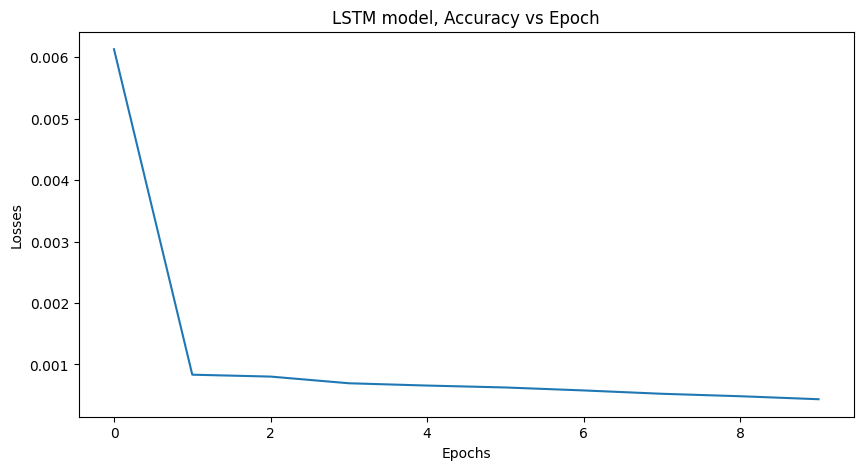

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


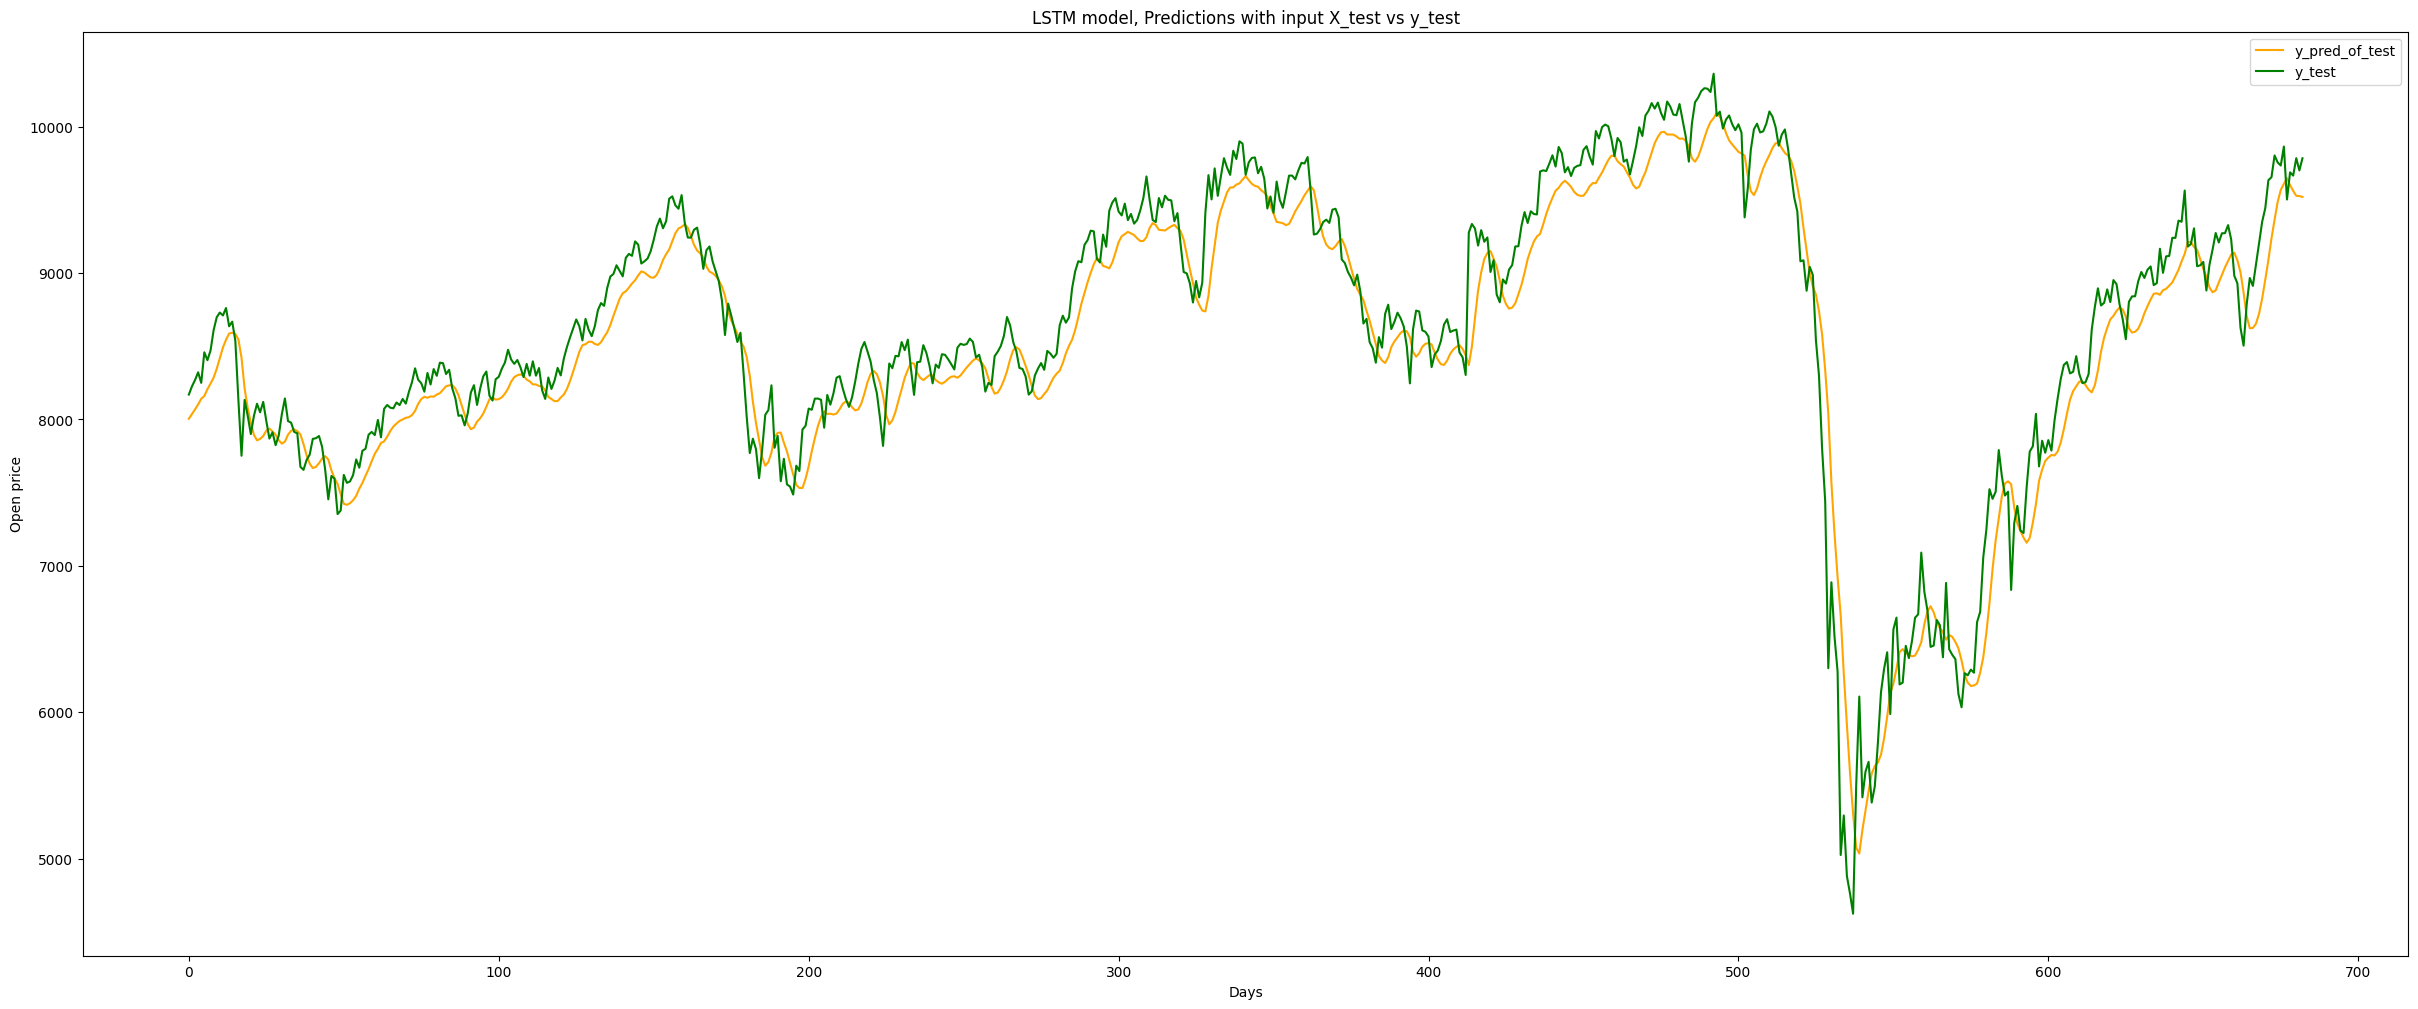

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
X_input = nifty_open_data.iloc[-time_step:]['Open'].values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.39791518],
        [0.30411937],
        [0.31391175],
        [0.48672575],
        [0.36570673],
        [0.44854237],
        [0.45065334],
        [0.5414845 ],
        [0.54125989],
        [0.62791387],
        [0.62220918],
        [0.77907512],
        [0.49764118],
        [0.51044384],
        [0.58919179],
        [0.39890398],
        [0.40357513],
        [0.4206006 ],
        [0.27689616],
        [0.4068995 ],
        [0.48281704],
        [0.5657878 ],
        [0.51821563],
        [0.56426029],
        [0.56511398],
        [0.6052732 ],
        [0.53312926],
        [0.35160117],
        [0.31296857],
        [0.09038195],
        [0.        ],
        [0.20704304],
        [0.33978643],
        [0.30012117],
        [0.40793305],
        [0.51875434],
        [0.62265839],
        [0.69075939],
        [0.83104996],
        [0.84600834],
        [0.95516787],
        [0.92021938],
        [0.90472142],
        [1.        ],
        [0.73401927],
        [0

In [ ]:
# prompt: give additional code to predict the data from the 25-10-2022 to 25-11-2022 exclusively for each date  using lstm and rnn

import datetime

# Assuming 'model_lstm' is your trained LSTM model and 'scaler' is your fitted scaler
# Also, assuming 'time_step' is defined as 50 as in your previous code


def predict_dates(model, scaler, X_input, start_date, end_date, time_step=50):
    future_predictions = []
    current_date = start_date

    while current_date < end_date:
        prediction = model.predict(X_input)[0][0]  # Predict the next day's open price
        prediction_original_scale = scaler.inverse_transform(np.array([[prediction]]))[0][0]
        future_predictions.append((current_date.strftime("%Y-%m-%d"), prediction_original_scale))

        # Prepare input for the next prediction (slide the window)
        X_input = np.append(X_input[0, 1:, :], [[prediction]], axis=0).reshape(1, time_step, 1)

        # Increment to the next day
        current_date += datetime.timedelta(days=1)
    return future_predictions


start_date = datetime.date(2022, 10, 25)
end_date = datetime.date(2022, 11, 25)
lstm_predictions = predict_dates(model_lstm, scaler, X_input, start_date, end_date)

# Now 'lstm_predictions' contains a list of tuples: (date, predicted_open_price)
# Print or further process as needed
for date, price in lstm_predictions:
  print(f"Date: {date}, Predicted Open Price (LSTM): {price}")

# Repeat the same process for the RNN model:
rnn_predictions = predict_dates(regressor, scaler, X_input, start_date, end_date)
for date, price in rnn_predictions:
  print(f"Date: {date}, Predicted Open Price (RNN): {price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

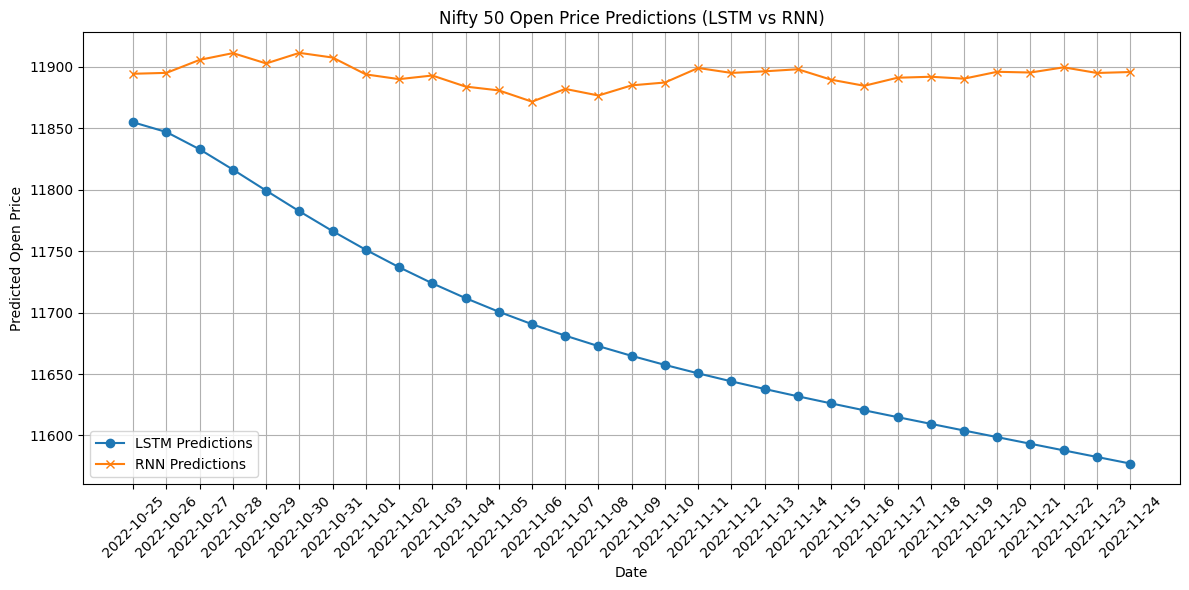

In [ ]:
# prompt: plot the graph for these predicted open price of 30 days of nifty 50 using python for both lstm model and rnn

import matplotlib.pyplot as plt

# Assuming lstm_predictions and rnn_predictions are already calculated as in the previous code
# lstm_predictions = [(date, price), ...]
# rnn_predictions = [(date, price), ...]

lstm_dates, lstm_prices = zip(*lstm_predictions)
rnn_dates, rnn_prices = zip(*rnn_predictions)

plt.figure(figsize=(12, 6))
plt.plot(lstm_dates, lstm_prices, label='LSTM Predictions', marker='o')
plt.plot(rnn_dates, rnn_prices, label='RNN Predictions', marker='x')

plt.xlabel('Date')
plt.ylabel('Predicted Open Price')
plt.title('Nifty 50 Open Price Predictions (LSTM vs RNN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

[*********************100%***********************]  1 of 1 completed


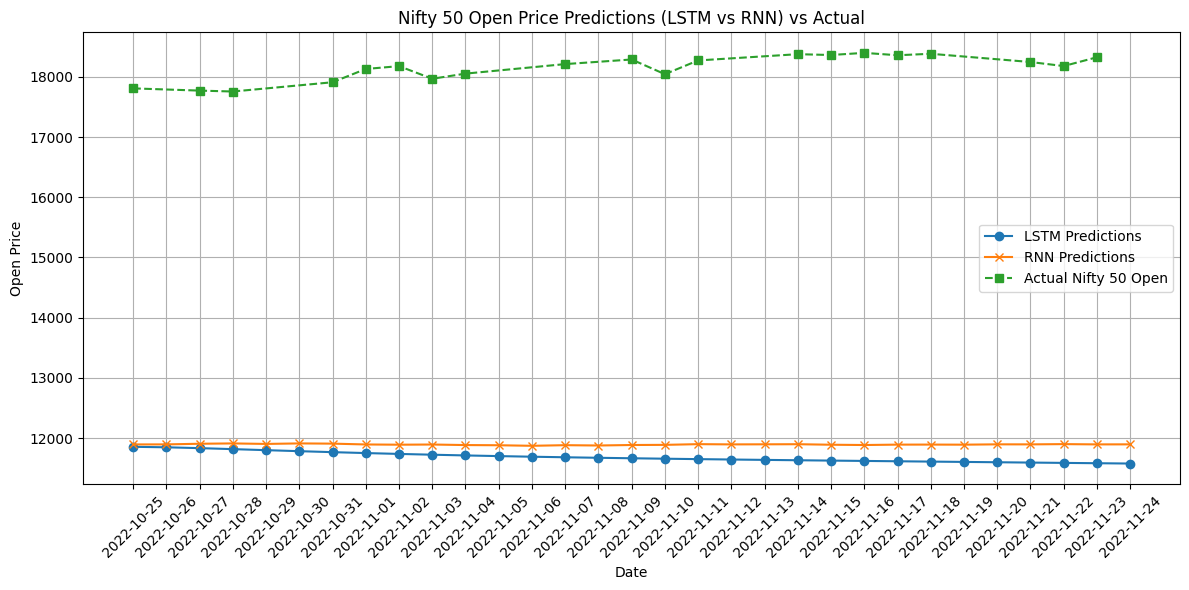

In [ ]:
# prompt: compare the predicted values by rnn and lstm model with real opening values of nifty 50

# Assuming lstm_predictions and rnn_predictions are already calculated as in the previous code
# lstm_predictions = [(date, price), ...]
# rnn_predictions = [(date, price), ...]

# Extract dates and prices for plotting
lstm_dates, lstm_prices = zip(*lstm_predictions)
rnn_dates, rnn_prices = zip(*rnn_predictions)

# Fetch the real Nifty 50 opening prices for the prediction period
# Replace 'start_date' and 'end_date' with your actual prediction period
start_date_str = lstm_dates[0]  # Get start date from predictions
end_date_str = lstm_dates[-1]    # Get end date from predictions

nifty_actual = yf.download("^NSEI", start=start_date_str, end=end_date_str)
actual_dates = nifty_actual.index.strftime('%Y-%m-%d').tolist()
actual_prices = nifty_actual['Open'].values.tolist()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(lstm_dates, lstm_prices, label='LSTM Predictions', marker='o')
plt.plot(rnn_dates, rnn_prices, label='RNN Predictions', marker='x')
plt.plot(actual_dates, actual_prices, label='Actual Nifty 50 Open', marker='s', linestyle='--') #Plot actual values

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Nifty 50 Open Price Predictions (LSTM vs RNN) vs Actual')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()